In [1]:
# from fit_tool.fit_file import FitFile
# from fit_tool.profile.messages.record_message import RecordMessage
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fit_helpers import fit_to_df, get_record_by_field
import os

plt.style.use('seaborn-darkgrid')

In [2]:
dir_fit = 'Data/FitFiles/'
act_fit = 'sample_act.fit';

pwd = os.getcwd();
os.chdir('..')
os.chdir(dir_fit);

In [3]:
output = fit_to_df(act_fit,0);
uniques = output[0];
print(uniques)
df = output[1];
df.head(15)

['garmin_product' 'manufacturer' 'serial_number' 'time_created' 'type'
 'software_version' 'unknown_0' 'unknown_1' 'unknown_2' 'unknown_253'
 'unknown_3' 'unknown_4' 'unknown_5' 'unknown_6' 'event' 'event_group'
 'event_type' 'timer_trigger' 'timestamp' 'device_index' 'source_type'
 'unknown_29' 'device_type' 'active_time_zone' 'activity_tracker_enabled'
 'auto_activity_detect' 'autosync_min_steps' 'autosync_min_time'
 'backlight_mode' 'date_mode' 'lactate_threshold_autodetect_enabled'
 'mounting_side' 'move_alert_enabled' 'time_mode' 'time_offset'
 'time_zone_offset' 'utc_offset' 'unknown_10' 'unknown_101' 'unknown_104'
 'unknown_107' 'unknown_108' 'unknown_109' 'unknown_11' 'unknown_110'
 'unknown_111' 'unknown_112' 'unknown_116' 'unknown_117' 'unknown_124'
 'unknown_125' 'unknown_126' 'unknown_127' 'unknown_128' 'unknown_129'
 'unknown_13' 'unknown_130' 'unknown_131' 'unknown_132' 'unknown_133'
 'unknown_137' 'unknown_138' 'unknown_139' 'unknown_14' 'unknown_140'
 'unknown_141' 'unk

,Time,Field,Value
0,NaT,garmin_product,4024
1,NaT,manufacturer,garmin
2,NaT,serial_number,3418241132
3,NaT,time_created,2022-10-22 12:00:30
4,NaT,type,activity
5,NaT,software_version,1227
6,NaT,unknown_0,9
7,NaT,unknown_1,71
8,NaT,unknown_2,27
9,NaT,unknown_253,1035374430


/home/sivaprakasaman/Documents/Code/running_analytics/Analysis/fit_helpers.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_out.drop(columns=["Field"], inplace=True);
/home/sivaprakasaman/Documents/Code/running_analytics/Analysis/fit_helpers.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_out['Time'] = times;


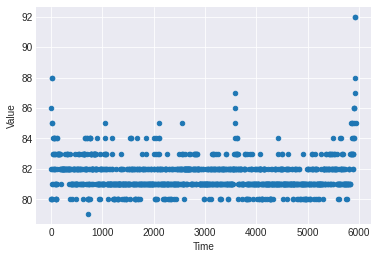

In [11]:
df_hr = get_record_by_field(df,'cadence');
df_hr.plot(x='Time',y = 'Value', kind = 'scatter');


In [ ]:
#fitparse code generated by chatGPT

# import fitparse
# import pandas as pd

# field = 'enhanced_speed';
# # Parse the fit file
# fitfile = fitparse.FitFile(act_fit)

# # Extract the data from the fit file
# data = []
# for record in fitfile.get_messages():
#     for record_data in record:
#         if record_data.name == 'timestamp':
#             tstamp = record_data.value;
#         if record_data.value is not None and record_data.name == field:
#             data.append([tstamp, record_data.name, record_data.value ])

# # Create a Pandas data frame from the data
# df = pd.DataFrame(data, columns=['Time','Field', 'Value'])
# df.head(1000)

# print(df['Time']-df['Time'][0])

# times = df['Time']-df['Time'][0];
# times = times.astype('timedelta64[s]')/60;

# print(times)
# df.loc[1,:].unique()
# df.size()
# plt.scatter(np.arange(0,df[field].size),df['Value'])

In [ ]:
#List all Fields


# all_lat = df[df['Field'] == 'position_lat'];
# all_lon = df[df['Field'] == 'position_long'];

In [ ]:
#again chatGPT suggested using Folium

# import folium

# # Create a map centered at the mean of the coordinates
# lat = all_lat.Value.to_numpy()/11930465; #needed to convert things
# lon = all_lon.Value.to_numpy()/11930465;

# mean_lat = sum(lat) / len(lat)
# mean_lon = sum(lon) / len(lon)
# map = folium.Map(location=[mean_lat, mean_lon])

# # Add the coordinates to the map as a line
# folium.PolyLine(locations=[(lat[i], lon[i]) for i in range(len(lat))], color="red", weight=2.5, opacity=1).add_to(map)

# # Save the map to an HTML file
# map.save("map.html")

In [ ]:
#again from the damn chatGPT - static_map doesn't seem to work

# import googlemaps
# import base64

# # Set up the Google Maps API client
# gmaps = googlemaps.Client(key='key')

# # Define the path using latitude and longitude coordinates
# path = np.zeros([len(lat),2]);
# for i in range(len(lat)):
#     path[i] = (lat[i],lon[i]);
    
# print(path)
# # Get the static map image from the API
# map_image = gmaps.static_map(path=path[0,0], size="640x640", zoom=2, maptype="roadmap", style="color:red|weight:5")

# # Save the image to a file
# with open("map.png", "wb") as f:
#     f.write(base64.b64decode(map_image['image']))


In [ ]:
# ## Trying fitdecode: https://pypi.org/project/fitdecode/

# import fitdecode

# with fitdecode.FitReader(act_fit) as fit:
#     for frame in fit:
#         # The yielded frame object is of one of the following types:
#         # * fitdecode.FitHeader (FIT_FRAME_HEADER)
#         # * fitdecode.FitDefinitionMessage (FIT_FRAME_DEFINITION)
#         # * fitdecode.FitDataMessage (FIT_FRAME_DATA)
#         # * fitdecode.FitCRC (FIT_FRAME_CRC)

#         if frame.frame_type == fitdecode.FIT_FRAME_DATA:
#             # Here, frame is a FitDataMessage object.
#             # A FitDataMessage object contains decoded values that
#             # are directly usable in your script logic.
#             print(frame.name)

In [ ]:
# fitdecode.FIT_FRAME_DATA

In [ ]:
# print(f'Converting activity file...')

# fit_file = FitFile.from_file(act_fit)
# fit_file.to_csv('activity.csv')

In [ ]:

#app_fit = FitFile.from_file(act_fit)



# timestamp1 = []
# power1 = []
# distance1 = []
# speed1 = []
# cadence1 = []

# for record in app_fit.records:
#     message = record.message
#     print(message)
#     if isinstance(message, RecordMessage):
#         timestamp1.append(message.timestamp)
#         distance1.append(message.distance)
#         power1.append(message.power)
#         speed1.append(message.speed)
#         cadence1.append(message.cadence)
    
#     start_timestamp = timestamp1[0]
#     time1 = np.array(timestamp1)
#     power1 = np.array(power1)
#     speed1 = np.array(speed1)
#     cadence1 = np.array(cadence1)
#     time1 = (time1 - start_timestamp) / 1000.0
    
#     ax1 = plt.subplot(311)
#     ax1.plot(time1, power1, '-o', label='app [W]')
#     ax1.legend(loc="upper right")
#     plt.xlabel('Time (s)')
#     plt.ylabel('Power (W)')

#     plt.subplot(312, sharex=ax1)
#     plt.plot(time1, speed1, '-o', label='app [m/s]')
#     plt.legend(loc="upper right")
#     plt.xlabel('Time (s)')
#     plt.ylabel('speed (m/s)')

#     plt.subplot(313, sharex=ax1)
#     plt.plot(time1, cadence1, '-o', label='app [rpm]')
#     plt.legend(loc="upper right")
#     plt.xlabel('Time (s)')
#     plt.ylabel('cadence (rpm)')

#     plt.show()